# DataSets: 
#### historic_prices_pkl
#### custom.pkl
#### intel_senti.pkl
#### intel_importable.pkl

In [2]:
pip install -U numpy==1.18.5

Note: you may need to restart the kernel to use updated packages.


In [60]:
import quandl
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import requests
import urllib
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [69]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time

import matplotlib.ticker as tkr
%matplotlib inline
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

# Historic Data-set Collection

In [14]:
quandl.ApiConfig.api_key = '58nMn45N8WncsaoZD1FS'
selected                 = ["AAPL","CSCO","INTC","MSFT"]
df1                      = quandl.get_table('WIKI/PRICES', 
                                             ticker = selected,
                                             qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                                             date = { 'gte': '2010-1-1', 'lte': '2019-12-31' }, 
                                             paginate = True)
print(df1.shape)
df1.head()

(8282, 3)


,date,ticker,adj_close
None,,,
0,2018-03-27,MSFT,89.47
1,2018-03-26,MSFT,93.78
2,2018-03-23,MSFT,87.18
3,2018-03-22,MSFT,89.79
4,2018-03-21,MSFT,92.48


In [15]:
df1 = df1.pivot(columns = 'ticker',index = "date",values = "adj_close")
df1 = pd.DataFrame(df1.to_records()).rename(columns={'date':'time'})
df1.head()


,time,AAPL,CSCO,INTC,MSFT
0,2010-01-04,27.503268,20.403200,16.019937,25.153472
1,2010-01-05,27.550818,20.312299,16.012265,25.161599
2,2010-01-06,27.112585,20.180079,15.958558,25.007183
3,2010-01-07,27.062465,20.270980,15.805111,24.748741
4,2010-01-08,27.242385,20.378409,15.981575,24.917785


In [16]:
df2 = df1.sort_values("time")
df2 = df2.set_index("time")
df2.tail()

,AAPL,CSCO,INTC,MSFT
time,,,,
2018-03-21,171.270,44.31,51.56,92.48
2018-03-22,168.845,43.07,50.83,89.79
2018-03-23,164.940,42.42,49.36,87.18
2018-03-26,172.770,44.06,52.48,93.78
2018-03-27,168.340,42.68,51.19,89.47


In [17]:
df2.to_pickle("data sets/historic_prices.pkl")

In [18]:
df3 = pd.read_pickle("data sets/historic_prices.pkl")
df3.head()

,AAPL,CSCO,INTC,MSFT
time,,,,
2010-01-04,27.503268,20.403200,16.019937,25.153472
2010-01-05,27.550818,20.312299,16.012265,25.161599
2010-01-06,27.112585,20.180079,15.958558,25.007183
2010-01-07,27.062465,20.270980,15.805111,24.748741
2010-01-08,27.242385,20.378409,15.981575,24.917785


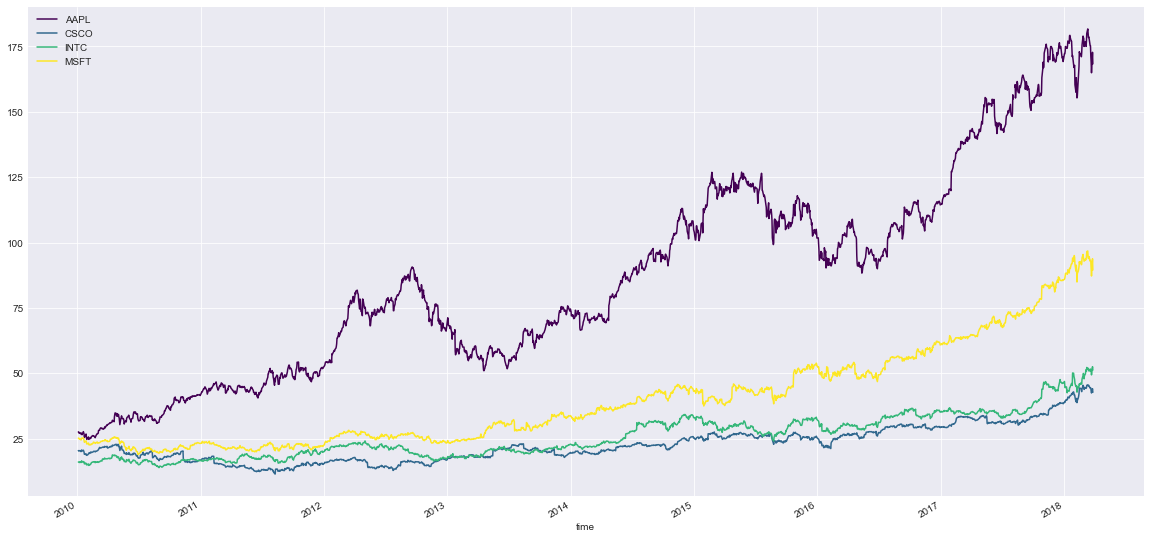

In [19]:
plt.style.use('seaborn-dark')

df3.plot(cmap= "viridis",figsize=(20,10))
plt.grid()
plt.show()

# Sentiment Analysis

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
df2 = pd.read_pickle("data sets/custom_cisco.pkl")

In [22]:
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 10, 2021",TORONTO — Softchoice (TSX: SFTC) today announc...
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 02, 2020","TORONTO — Softchoice , a leading North America..."
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 04, 2021","FRANKLIN, Tenn. — Elevēo announces the integr..."
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 20, 2019","Saving time, energy and money, Ingram Micro’s ..."
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Apr 14, 2021",News Summary:SAN FRANCISCO — Cisco AppDynamics...
...,...,...,...,...,...
1345,135,https://financialpost.com/search/?search_text=...,https://financialpost.com/executive/leadership...,"Mar 17, 2014",OTTAWA — In the five years since Nortel went b...
1346,135,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/dissectin...,"Jun 06, 2017",SAN FRANCISCO — When a withered Yahoo is absor...
1347,135,https://financialpost.com/search/?search_text=...,https://financialpost.com/executive/executive-...,"Nov 12, 2020",Good Morning!Seven months into the pandemic an...
1348,135,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/economy/public-...,"May 01, 2012","Police officers and firefighters in San Jose, ..."


In [23]:
text_1 = df2["internals_text"]
text_1

0       TORONTO — Softchoice (TSX: SFTC) today announc...
1       TORONTO — Softchoice , a leading North America...
2       FRANKLIN, Tenn. — Elevēo  announces the integr...
3       Saving time, energy and money, Ingram Micro’s ...
4       News Summary:SAN FRANCISCO — Cisco AppDynamics...
                              ...                        
1345    OTTAWA — In the five years since Nortel went b...
1346    SAN FRANCISCO — When a withered Yahoo is absor...
1347    Good Morning!Seven months into the pandemic an...
1348    Police officers and firefighters in San Jose, ...
1349    TORONTO • A stack of iPads greets hungry diner...
Name: internals_text, Length: 1350, dtype: object

In [24]:
text_1[0]

'TORONTO — Softchoice (TSX: SFTC) today announced that it has been honored with Social Impact Partner of the Year – Global and Americas Security Partner of the Year at the Cisco Partner Summit 2021. These honors recognize the commitment of our Company and our people to create success for our customers’ organizations, their IT professionals and our communities.  The Cisco Partner Summit Global awards recognize and reward superior business practices of channel partners. Areas of consideration include innovative processes, architecture-led successes, strategic business outcome-focused programs, seizing new opportunities, and sales approaches. '

In [25]:
def split_by_dot(x):
    return(x.split("."))

df2["internals_text_split_by_dot"] = df2["internals_text"].apply(split_by_dot) 

df2["internals_text_split_by_dot"]

0       [TORONTO — Softchoice (TSX: SFTC) today announ...
1       [TORONTO — Softchoice , a leading North Americ...
2       [FRANKLIN, Tenn,  — Elevēo  announces the inte...
3       [Saving time, energy and money, Ingram Micro’s...
4       [News Summary:SAN FRANCISCO — Cisco AppDynamic...
                              ...                        
1345    [OTTAWA — In the five years since Nortel went ...
1346    [SAN FRANCISCO — When a withered Yahoo is abso...
1347    [Good Morning!Seven months into the pandemic a...
1348    [Police officers and firefighters in San Jose,...
1349    [TORONTO • A stack of iPads greets hungry dine...
Name: internals_text_split_by_dot, Length: 1350, dtype: object

In [26]:
df2["time"] = pd.to_datetime(df2["internals_dates"])
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot,time
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 10, 2021",TORONTO — Softchoice (TSX: SFTC) today announc...,[TORONTO — Softchoice (TSX: SFTC) today announ...,2021-11-10
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 02, 2020","TORONTO — Softchoice , a leading North America...","[TORONTO — Softchoice , a leading North Americ...",2020-11-02
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 04, 2021","FRANKLIN, Tenn. — Elevēo announces the integr...","[FRANKLIN, Tenn, — Elevēo announces the inte...",2021-11-04
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Nov 20, 2019","Saving time, energy and money, Ingram Micro’s ...","[Saving time, energy and money, Ingram Micro’s...",2019-11-20
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Apr 14, 2021",News Summary:SAN FRANCISCO — Cisco AppDynamics...,[News Summary:SAN FRANCISCO — Cisco AppDynamic...,2021-04-14


In [27]:
df2 = df2.sort_values("time")
df2 = df2.set_index("time")
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot
time,,,,,,
2011-11-30,14,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/today-in-...,"Nov 30, 2011",Tech firms making news this morning: Internati...,[Tech firms making news this morning: Internat...
2011-12-05,72,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/even-with-...,"Dec 05, 2011",Even with the Standard & Poor’s 500 Index down...,[Even with the Standard & Poor’s 500 Index dow...
2011-12-14,81,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/trading-de...,"Dec 14, 2011",Barron’s gets a lot of attention when it recom...,[Barron’s gets a lot of attention when it reco...
2011-12-14,25,https://financialpost.com/search/?search_text=...,https://financialpost.com/investing/how-to-pla...,"Dec 14, 2011",An agreement between European leaders to help ...,[An agreement between European leaders to help...
2011-12-20,24,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/belden-ma...,"Dec 20, 2011",Shareholders of RuggedCom Inc. could be in for...,"[Shareholders of RuggedCom Inc, could be in f..."


In [28]:
df2.to_pickle("data sets/cisco_with_time.pkl")

In [29]:
df2 = pd.read_pickle("data sets/cisco_with_time.pkl")
df2.dropna(inplace=True)

In [30]:
def sentimental_analysis_by_phrase(y):
    
    y = list(map(lambda x: analyser.polarity_scores(x)["compound"],y))
    y = np.array(y)
    y = y[y != 0]
    return(y)


In [31]:

text_2 = df2["internals_text_split_by_dot"][0]
text_2

['Tech firms making news this morning: International Business Machines (IBM) Corp',
 ', Google Inc',
 ', Hewlett Packard Co',
 ', Zynga Inc',
 ', Advanced Micro Devices (AMD) Inc',
 ', Intel Corp',
 ' and Cisco Systems Inc',
 'The final tally from IBM: Cyber Monday online spending up 30 percent from last year , [ TechCrunch ]:Google Earth, foreign wars, and the future of satellite imagery , [ Fast Company ]:Hackers can remotely set ablaze HP printers, researchers say , [ Wired ]:HP wants to optimize your information, whatever that means , [ AllThingsDigital ]:Zynga to kick off IPO roadshow next week: sources , [Reuters]:AMD shifting competitive focus away from Intel in 2012 , [ The Verge ]:Cyberwar storm clouds are gathering , [ New Scientist ]:Cisco: Global cloud traffic will increase 12-fold by 2015 , [ Venturebeat ]:British Library scans 18th and 19th century newspapers , [ BBC ]:']

In [32]:
sentimental_analysis_by_phrase(text_2)

array([0.25])

In [33]:
df2["sentimental_analysis_split_by_dot"] = df2["internals_text_split_by_dot"].apply(sentimental_analysis_by_phrase) 

df2["sentimental_analysis_split_by_dot"]

time
2011-11-30                              [0.25]
2011-12-05                           [-0.5423]
2011-12-14                    [0.4767, 0.2023]
2011-12-14                            [0.6486]
2011-12-20                            [0.4404]
                            ...               
2021-11-18    [-0.2263, -0.296, 0.7003, 0.296]
2021-11-18                            [0.3612]
2021-11-19                     [0.128, 0.3182]
2021-11-19                      [0.128, 0.296]
NaT                                         []
Name: sentimental_analysis_split_by_dot, Length: 1350, dtype: object

In [34]:
df2.dropna(inplace=True)

In [35]:
df2["sentimental_analysis_split_by_dot_average"] = df2["sentimental_analysis_split_by_dot"].apply(np.mean)
df2["sentimental_analysis_split_by_dot_average"]

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


time
2011-11-30    0.2500
2011-12-05   -0.5423
2011-12-14    0.3395
2011-12-14    0.6486
2011-12-20    0.4404
               ...  
2021-11-18    0.1185
2021-11-18    0.3612
2021-11-19    0.2231
2021-11-19    0.2120
NaT              NaN
Name: sentimental_analysis_split_by_dot_average, Length: 1350, dtype: float64

In [36]:
def sentimental_analysis(y):
    
    return(analyser.polarity_scores(y)["compound"])


In [37]:
df2["sentimental_analysis_complete_text"] = df2["internals_text"].apply(sentimental_analysis) 

df2["sentimental_analysis_complete_text"]

time
2011-11-30    0.2500
2011-12-05   -0.5423
2011-12-14    0.5994
2011-12-14    0.6486
2011-12-20    0.4404
               ...  
2021-11-18    0.5994
2021-11-18    0.3612
2021-11-19    0.4215
2021-11-19    0.4019
NaT           0.0000
Name: sentimental_analysis_complete_text, Length: 1350, dtype: float64

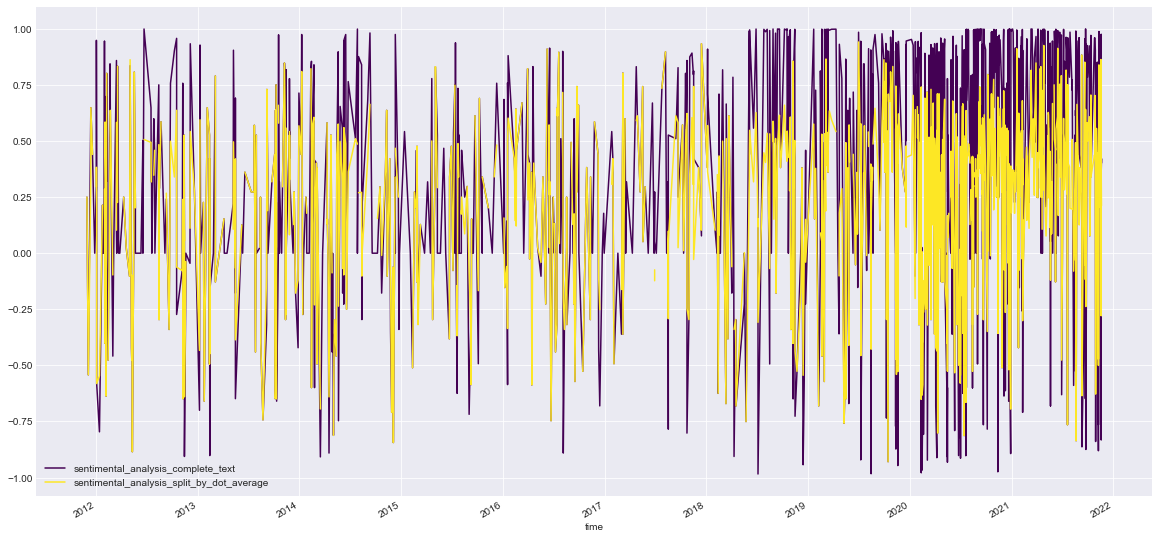

In [38]:
plt.style.use('seaborn-dark')
df2[["sentimental_analysis_complete_text","sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (20,10))
plt.grid()
plt.show()

In [39]:
df2.to_pickle("data sets/cisco_senti.pkl")

# Combinging the 2 datasets (Prices and sentiment)

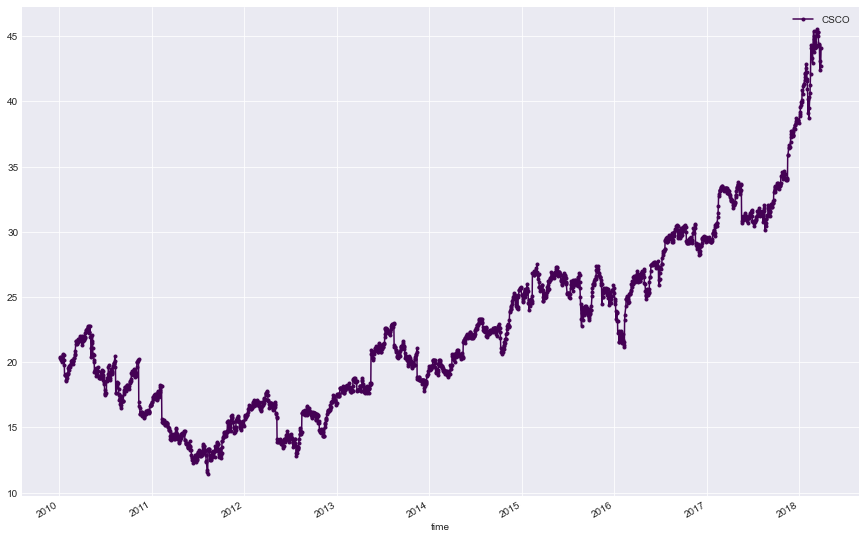

In [46]:
df_values = pd.read_pickle("data sets/historic_prices.pkl")
#df_values.head()


cisco_df = df_values[["CSCO"]]
cisco_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

In [47]:
df_text = pd.read_pickle("data sets/cisco_senti.pkl")
X = df_text["sentimental_analysis_split_by_dot_average"].copy()
X = X.reset_index(drop= False)
X["time"] = pd.to_datetime(X["time"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["time"] = pd.to_datetime(X["time"])

X = X.set_index(pd.DatetimeIndex(X["time"]))
X.set_index("time")
X.shape

(1350, 2)

In [48]:
df_text = pd.read_pickle("data sets/cisco_senti.pkl")

names     = df_text.columns
df_final = df_text[names[5:]].copy()

df_final = df_final.set_index(X.index)

X = pd.concat([X,df_final],axis= 1)

In [49]:
X = X.drop(["time"],axis= 1)

In [50]:
X = X.resample('1d').first()
X = X.tz_convert(None)


In [51]:
y = cisco_df.copy()
y.shape

(2071, 1)

In [52]:
result = pd.concat([X,y], axis=1,join='inner')
result.shape


(1589, 6)

In [53]:
result = result.fillna(method='ffill', inplace=False)



In [54]:
result.shape

(1589, 6)

In [55]:
result.dropna(inplace=True)
result

,sentimental_analysis_split_by_dot_average,internals_text_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_complete_text,CSCO
time,,,,,,
2011-11-30,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,15.575561
2011-12-01,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,15.525425
2011-12-02,0.2500,[Tech firms making news this morning: Internat...,[0.25],0.2500,0.2500,15.500357
2011-12-05,-0.5423,[Even with the Standard & Poor’s 500 Index dow...,[-0.5423],-0.5423,-0.5423,15.700901
2011-12-06,-0.5423,[Even with the Standard & Poor’s 500 Index dow...,[-0.5423],-0.5423,-0.5423,15.650765
...,...,...,...,...,...,...
2018-03-21,-0.3818,[A battle for big data is brewing in the oilpa...,[-0.3818],-0.3818,-0.3818,44.310000
2018-03-22,0.6124,"[With U, S, President Donald Trump ready to s...",[0.6124],0.6124,0.6124,43.070000
2018-03-23,0.6124,"[With U, S, President Donald Trump ready to s...",[0.6124],0.6124,0.6124,42.420000


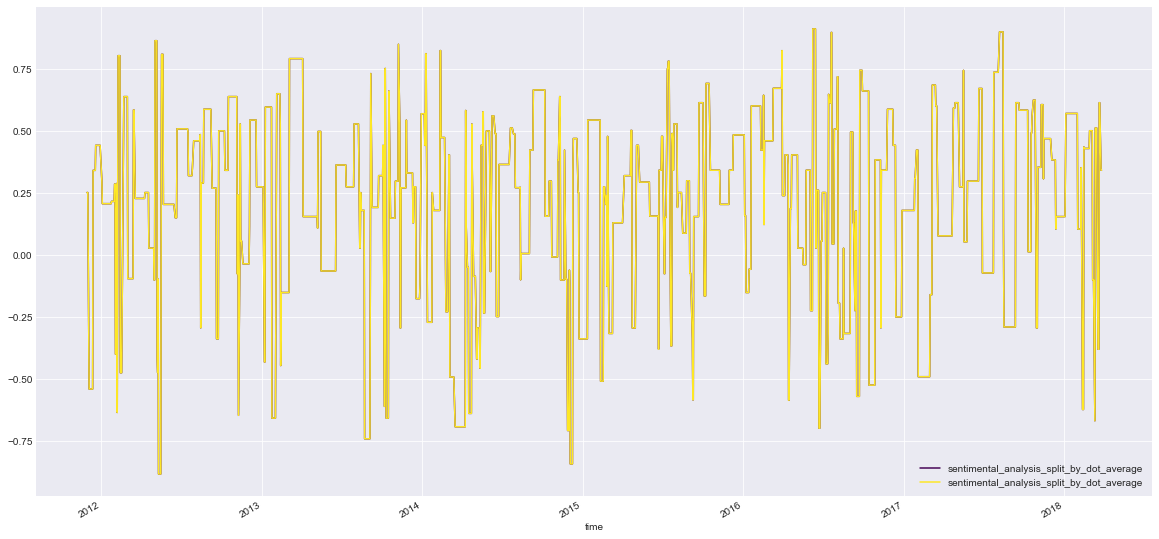

In [58]:
result[["sentimental_analysis_split_by_dot_average"]].plot(cmap = "viridis",linestyle='-',figsize = (20,10))
plt.grid()
plt.show()

In [59]:
result.to_pickle("data sets/cisco_importable.pkl")

# Final Modeling for LSTM w/o Sentiment Analysis

In [167]:
result= pd.read_pickle("data sets/cisco_importable.pkl")

# original time serie (Y)
y = result.CSCO.values 
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)



# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [168]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)




# join the all the features in one
## reshape arrays
X_train_features = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))


In [169]:
model = Sequential()
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_y)

30


In [170]:
model.add(LSTM(200, input_shape=(X_train_features.shape[1], X_train_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 200)               184800    
_________________________________________________________________
dropout_15 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 185,001
Trainable params: 185,001
Non-trainable params: 0
_________________________________________________________________


In [171]:


history = model.fit(X_train_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
train_predict = model.predict(X_train_features)
test_predict  = model.predict(X_test_features)

print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

Train Mean Absolute Error: 0.047831584
Train Root Mean Squared Error: 0.052320514
Test Mean Absolute Error: 0.048319414
Test Root Mean Squared Error: 0.07935489


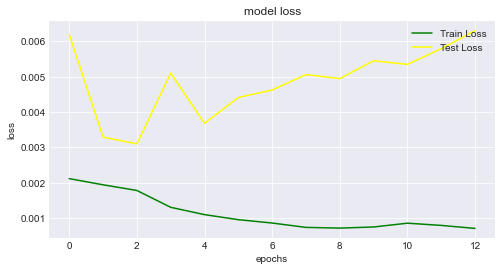

In [172]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')

plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

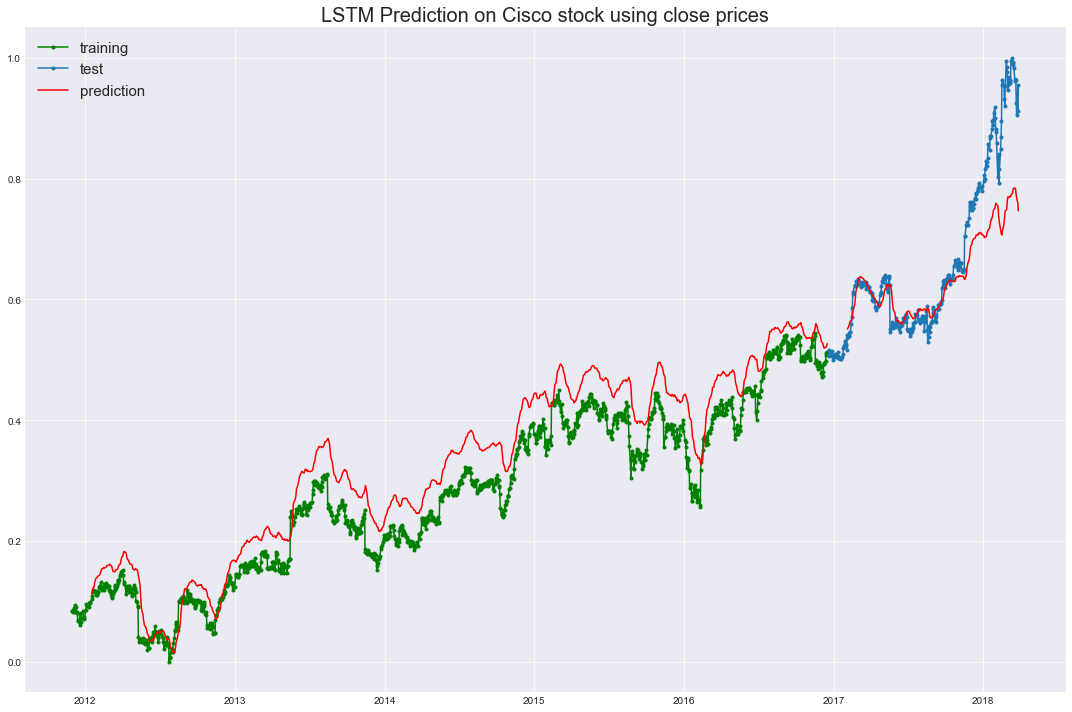

In [173]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM Prediction on Cisco stock using close prices",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

# Modeling with sentiment Analysis

In [174]:
result= pd.read_pickle("data sets/cisco_importable.pkl")

# original time serie (Y)
y = result.CSCO.values #numpy.ndarray
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)


# extra information: features of the sentiment analysis
X = result.sentimental_analysis_split_by_dot_average.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.8
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:train_size+test_size,:]



def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
test_x.shape

(318, 1)

In [175]:
look_back = 30


# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)


In [176]:
temp_x= X_train_features.shape[1]
temp_y =X_train_features.shape[2]
print(temp_y)

30


In [177]:
model = Sequential()
model.add(LSTM(200, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=300, batch_size=25, validation_data=(X_test_all_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 200)               184800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 185,001
Trainable params: 185,001
Non-trainable params: 0
_________________________________________________________________


In [178]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

Train Mean Absolute Error: 0.06363754
Train Root Mean Squared Error: 0.068534434
Test Mean Absolute Error: 0.033826634
Test Root Mean Squared Error: 0.053755574


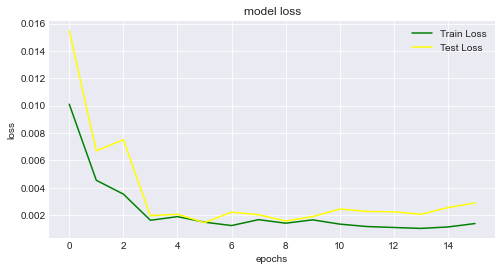

In [179]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

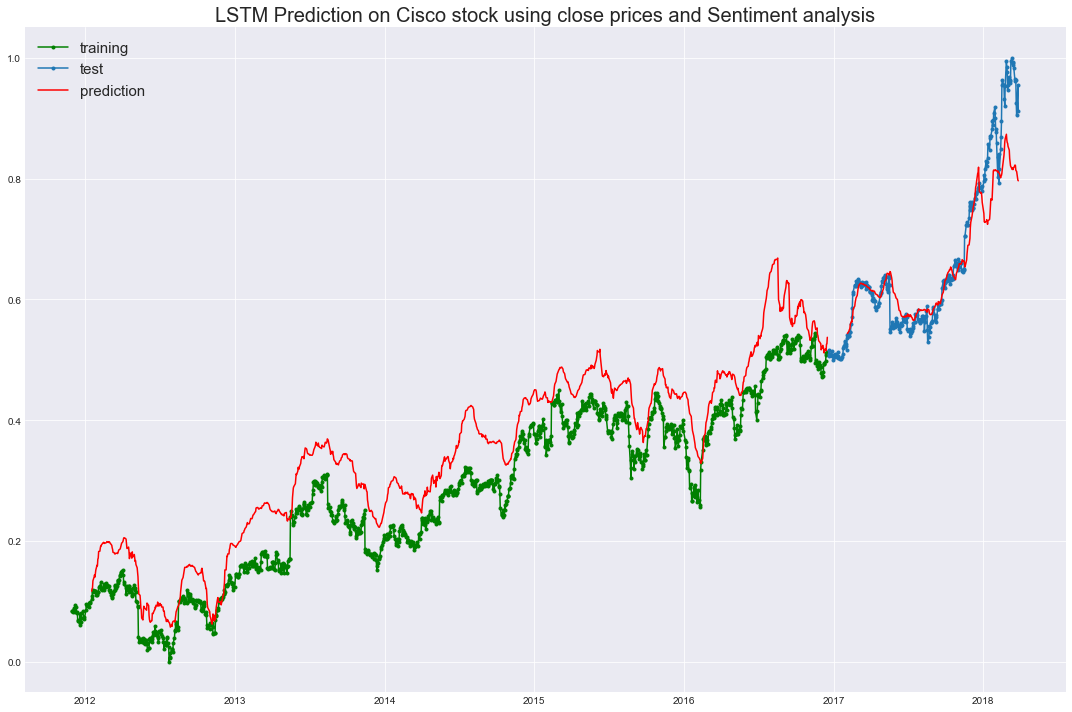

In [181]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[look_back+1:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[look_back+1:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM Prediction on Cisco stock using close prices and Sentiment analysis",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();